In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_temperatur = pd.read_csv('C:/Users/nasut/OneDrive/Documents/Kuliah/Semester 7/PKKM/BMKG/Project/Data/data_fix_temp.txt')
df_temperatur.head(10)
df_temperatur = df_temperatur.set_index('Date')

In [3]:
df_temperatur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544274 entries, 2021-02-27 15:00:00 to 2023-04-13 00:00:00
Data columns (total 38 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   lokasi        544274 non-null  int64  
 1   con_prec.mm.  544274 non-null  float64
 2   mic_prec.mm.  544274 non-null  float64
 3   sha_prec.mm.  544274 non-null  int64  
 4   suhu2m.degC.  544274 non-null  float64
 5   dew2m.degC.   544274 non-null  float64
 6   rh2m...       544274 non-null  float64
 7   wspeed.m.s.   544274 non-null  float64
 8   wdir.deg.     544274 non-null  float64
 9   lcloud...     544274 non-null  float64
 10  mcloud...     544274 non-null  float64
 11  hcloud...     544274 non-null  float64
 12  surpre.Pa.    544274 non-null  float64
 13  clmix.kg.kg.  544274 non-null  float64
 14  wamix.kg.kg.  544274 non-null  float64
 15  outlr.W.m2.   544274 non-null  float64
 16  pblh.m.       544274 non-null  float64
 17  lifcl.m.      544274 n

<Axes: xlabel='Date', ylabel='t_obs'>

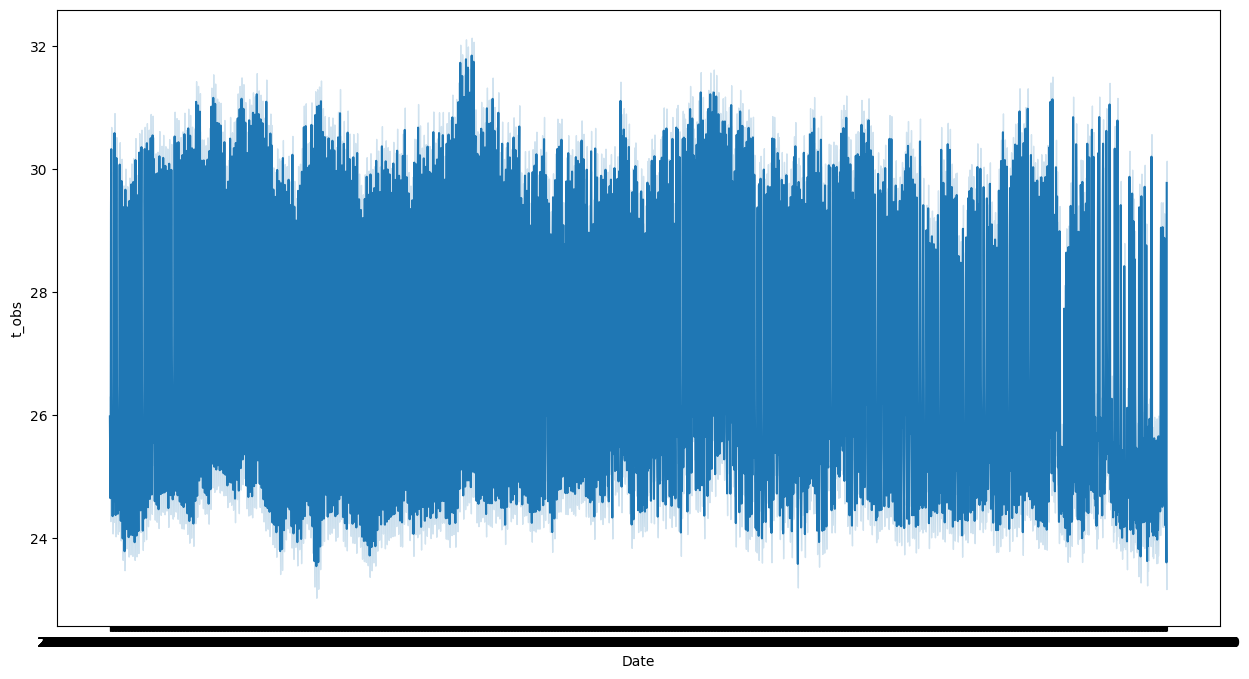

In [4]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df_temperatur, x='Date', y='t_obs')

In [5]:
df_temperatur.describe()

,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,...,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs
count,544274.000000,544274.000000,5.442740e+05,544274.0,544274.000000,544274.000000,544274.000000,544274.000000,544274.000000,544274.000000,...,544274.000000,544274.000000,544274.000000,544274.000000,544274.000000,544274.0,544274.000000,544274.000000,544274.000000,544274.000000
mean,96884.176938,0.625100,1.633177e-01,0.0,26.238859,22.720439,82.063592,2.591375,181.631337,0.607279,...,-5.047452,67.607710,5.349764,144.651146,0.160974,12.0,-3.041791,115.316266,102.723196,27.188873
std,588.248982,1.715435,1.804061e+00,0.0,2.880975,2.107988,11.518075,1.716567,98.590547,0.273119,...,0.750793,22.168508,2.749737,87.580012,0.367507,0.0,4.024515,11.472831,269.274703,3.117043
min,96001.000000,0.000000,0.000000e+00,0.0,11.394600,3.866710,23.164500,0.003070,0.000916,0.000000,...,-8.813010,0.000015,0.089455,0.145816,0.000000,12.0,-10.766620,95.337850,0.000000,9.700000
25%,96297.000000,0.000000,0.000000e+00,0.0,24.272600,21.946800,74.607950,1.293880,103.649250,0.433848,...,-5.539040,56.068250,3.244365,81.348200,0.000000,12.0,-6.700000,106.422000,5.000000,25.000000
50%,96855.000000,0.013227,0.000000e+00,0.0,26.546600,23.210800,83.399600,2.235905,176.662000,0.645353,...,-5.056590,72.620050,5.000060,107.554000,0.000000,12.0,-3.045240,114.355300,15.000000,26.900000
75%,97282.000000,0.318031,4.262848e-09,0.0,28.278975,24.120200,90.933500,3.530938,266.124750,0.818182,...,-4.568865,84.478875,7.078793,216.558000,0.000000,12.0,-0.142060,122.852500,50.000000,29.600000
max,99992.000000,35.757000,1.141500e+02,0.0,36.192300,27.283400,100.000000,22.739000,359.998000,1.000000,...,-0.671190,100.000000,25.247400,359.682000,1.000000,12.0,5.876550,140.720000,1653.000000,37.200000


In [6]:
# split data
train_size = int(len(df_temperatur) * 0.7) # Menentukan banyaknya data train yaitu sebesar 70% data
train = df_temperatur[:train_size]
test = df_temperatur[train_size:].reset_index(drop=True)

In [7]:
test

,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,...,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs
0,97192,0.000000,0.000000e+00,0,27.2293,23.1361,78.4728,2.528380,96.014,0.028717,...,-3.40484,9.72667,4.51424,130.387,0,12,-5.47000,122.6200,233,25.2
1,97192,0.000000,0.000000e+00,0,26.9765,23.0479,79.2239,2.288090,113.560,0.170331,...,-4.09648,9.41694,3.81404,166.173,0,12,-5.47000,122.6200,233,24.0
2,97192,0.000000,0.000000e+00,0,27.1750,23.6028,80.9713,2.395750,128.357,0.668411,...,-5.16860,12.89480,4.11082,191.373,0,12,-5.47000,122.6200,233,23.6
3,97192,0.187661,0.000000e+00,0,27.3055,23.3866,79.3130,2.072000,226.387,0.779213,...,-4.71812,9.79608,3.68201,181.876,0,12,-5.47000,122.6200,233,27.8
4,97192,0.000000,1.434220e-33,0,28.0087,23.9243,78.6192,3.674180,239.414,0.611282,...,-4.86506,10.31720,3.72441,177.438,0,12,-5.47000,122.6200,233,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163278,99992,0.003601,0.000000e+00,0,29.7642,23.4001,68.8035,3.721340,261.504,0.390150,...,-4.69787,73.07580,2.29511,231.967,0,12,-6.30253,106.7564,41,31.8
163279,99992,3.669660,7.573590e-21,0,30.7901,24.1140,67.7143,5.811930,263.944,0.536106,...,-4.63960,75.79220,2.05083,268.579,0,12,-6.30253,106.7564,41,35.0
163280,99992,4.045040,2.640270e-09,0,28.8450,24.1964,76.1178,5.839920,268.895,0.229447,...,-4.40575,77.14890,2.52709,272.922,0,12,-6.30253,106.7564,41,30.6
163281,99992,0.000000,0.000000e+00,0,25.8334,23.9709,89.6050,0.500122,210.749,0.087511,...,-4.33471,76.31700,3.07955,259.250,1,12,-6.30253,106.7564,41,28.4


In [8]:
train

,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,...,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.433260,12.4580,0.553781,...,-5.20890,11.08890,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2
2021-02-27 18:00:00,96001,0.000000,0.000000e+00,0,27.0090,21.5161,72.0376,3.049010,27.2450,0.640686,...,-5.05963,12.70440,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0
2021-02-27 21:00:00,96001,0.000000,0.000000e+00,0,26.5672,21.4226,73.5149,2.045560,37.3569,0.717464,...,-4.89987,15.23810,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6
2021-02-28 00:00:00,96001,0.000000,0.000000e+00,0,26.4519,21.5400,74.5507,2.225080,20.1816,0.698006,...,-4.72228,16.30070,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8
2021-02-28 03:00:00,96001,0.000000,0.000000e+00,0,26.7230,21.3691,72.6038,2.342680,14.7934,0.626203,...,-4.64246,19.04420,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-07 21:00:00,97192,0.000000,0.000000e+00,0,26.7966,22.4986,77.4455,4.128440,91.6445,0.000000,...,-4.30799,9.47546,1.23393,197.9580,0,12,-5.47000,122.62000,233,22.8
2022-12-08 00:00:00,97192,0.000000,0.000000e+00,0,28.1374,20.8309,64.6555,0.591282,241.2810,0.000000,...,-3.76958,7.87306,1.70898,179.5150,0,12,-5.47000,122.62000,233,27.6
2022-12-08 03:00:00,97192,0.000000,0.000000e+00,0,28.0331,23.0964,74.6867,3.917690,237.6500,0.333035,...,-3.33338,7.08372,2.79259,155.5270,0,12,-5.47000,122.62000,233,31.6


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['t_obs']])

train['t_obs_scaled'] = scaler.transform(train[['t_obs']])
test['t_obs_scaled'] = scaler.transform(test[['t_obs']])

In [10]:
train.head()

,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,...,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs,t_obs_scaled
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-27 15:00:00,96001,0.0,0.0,0,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,...,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2,0.421488
2021-02-27 18:00:00,96001,0.0,0.0,0,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,...,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0,0.413223
2021-02-27 21:00:00,96001,0.0,0.0,0,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,...,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6,0.355372
2021-02-28 00:00:00,96001,0.0,0.0,0,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,...,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8,0.280992
2021-02-28 03:00:00,96001,0.0,0.0,0,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,...,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4,0.636364


In [11]:
def sliding_window(data, window_size):
    sub_seq, next_values = [], []
    for i in range(len(data)-window_size):
        sub_seq.append(data[i:i+window_size])
        next_values.append(data[i+window_size])
    X = np.stack(sub_seq)
    y = np.array(next_values)
    return X,y

In [12]:
window_size = 24

X_train, y_train = sliding_window(train[['t_obs_scaled']].values, window_size)
X_test, y_test = sliding_window(test[['t_obs_scaled']].values, window_size)

In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(380967, 24, 1) (380967, 1)
(163259, 24, 1) (163259, 1)


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM #, RNN, GRU   


In [15]:
tf. __version__

'2.10.0'

In [16]:
def create_model(LSTM_unit=64, dropout=0.2): #jika ingin menggunakan RNN atau GRU ganti LSTM dengan GRU/RNN
    # create model
    model = Sequential()
    model.add(LSTM(units=LSTM_unit, input_shape=(window_size, 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

In [17]:
LSTM_unit = [16,32,64,128]
dropout = [0.1,0.2]

In [18]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
# Early Stopping
es = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 5, verbose = 0)

# create model
model = KerasRegressor(build_fn=create_model, epochs=50, validation_split=0.1, batch_size=32, callbacks=[es], verbose=1)

# define the grid search parameters
LSTM_unit = [16,32,64,128]
dropout=[0.1,0.2]
param_grid = dict(LSTM_unit=LSTM_unit, dropout=dropout)

In [22]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2, cv=5)


In [23]:
grid_result = grid.fit(X_train, y_train)

KeyboardInterrupt: 